# Sklearn Digits Data Analysis

### Getting the data in order

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

digits = datasets.load_digits()

In [10]:
X = digits.data
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [11]:
y = digits.target
print(y)

[0 1 2 ... 8 9 8]


### Performing K-fold Cross Validation

In [12]:
def do_Kfold(model, X, y, k, scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [13]:
from sklearn.svm import SVC as SVC

In [14]:
svc = SVC()

In [15]:
results = do_Kfold(model = svc, X = digits.data, y = y, k = 25, scaler = None, random_state = 146)

In [16]:
results

([0.9959420289855072,
  0.9959420289855072,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9971014492753624,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9976811594202899,
  0.9971014492753624,
  0.9965217391304347,
  0.9965217391304347,
  0.9965217391304347,
  0.9971014492753624,
  0.9965217391304347,
  0.996523754345307,
  0.996523754345307,
  0.9959443800695249],
 [1.0,
  0.9722222222222222,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  0.9722222222222222,
  0.9583333333333334,
  0.9861111111111112,
  0.9861111111111112,
  0.9861111111111112,
  1.0,
  1.0,
  0.9722222222222222,
  0.9861111111111112,
  1.0,
  0.9861111111111112,
  1.0,
  1.0,
  1.0,
  0.9859154929577465,
  1.0,
  0.9859154929577465])

In [17]:
np.mean(results[1])

0.9888732394366196

#### The scores are very good

### Now lets do a single train test split

In [18]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

### Then fit and score the model

In [19]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
svc.score(X_test, y_test)

0.9755555555555555

In [21]:
predicted = svc.predict(X_test)
print(predicted)

[7 8 9 8 5 5 7 7 2 7 1 2 1 2 5 8 7 3 7 0 3 5 7 2 7 4 4 4 5 2 8 1 8 3 8 3 7
 0 1 3 2 6 8 1 3 9 3 6 9 2 7 5 8 0 4 3 9 2 9 4 7 9 1 2 3 9 9 4 7 1 1 3 2 3
 1 1 1 8 0 8 8 2 2 2 4 5 6 6 6 7 7 0 8 5 7 1 2 6 2 6 2 4 6 3 6 3 2 8 4 4 0
 2 7 6 9 5 6 3 0 5 8 0 0 1 7 6 2 9 2 6 0 1 1 8 5 3 7 5 8 0 8 0 2 3 8 5 9 3
 7 6 5 5 0 3 5 0 6 8 1 5 9 3 1 1 1 9 7 8 4 9 2 4 2 9 7 4 6 0 0 2 9 2 1 3 4
 3 7 9 7 7 7 9 4 6 5 2 1 1 7 6 0 1 1 5 1 8 0 4 4 5 8 8 3 5 7 8 2 6 9 1 5 9
 9 0 5 1 5 7 7 7 6 0 9 0 7 8 1 1 3 4 2 3 5 8 5 3 2 6 7 0 7 9 3 2 4 8 0 2 0
 2 8 3 2 6 2 0 4 4 8 7 9 7 3 9 9 9 4 9 1 3 1 0 4 8 8 9 1 8 3 2 6 8 6 9 3 4
 9 8 0 9 7 0 7 4 7 8 0 6 8 7 3 5 4 4 3 3 1 8 9 4 2 5 1 1 2 8 8 1 3 9 0 4 6
 3 0 7 9 3 3 9 3 1 7 4 1 3 2 5 6 5 7 9 4 4 3 9 0 3 1 4 0 9 9 9 2 0 0 5 9 2
 3 0 2 6 1 8 3 8 3 1 3 0 6 6 0 9 8 9 1 8 3 5 0 8 3 2 6 0 9 6 1 9 6 4 8 0 5
 0 4 2 6 7 6 4 6 4 1 0 1 2 2 6 9 6 6 5 8 0 0 7 7 7 4 5 0 2 3 4 1 7 7 6 4 3
 1 3 7 2 1 1]


### Displaying the results

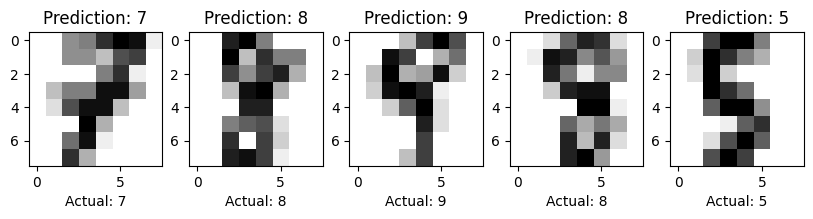

In [22]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
for ax, image, prediction, actual in zip(axes, X_test[0:5], predicted[0:5], y_test[0:5]):
    # ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
    ax.set_xlabel(f"Actual: {actual}")

/var/folders/09/89sg1_cs6g398bhb1kgqk7540000gn/T/ipykernel_41446/2234299510.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))


KeyboardInterrupt: 

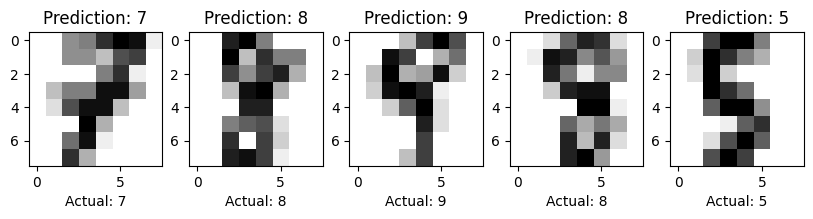

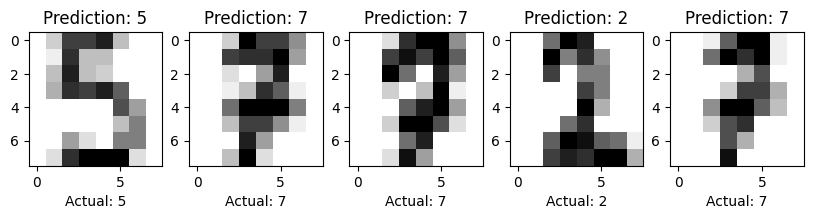

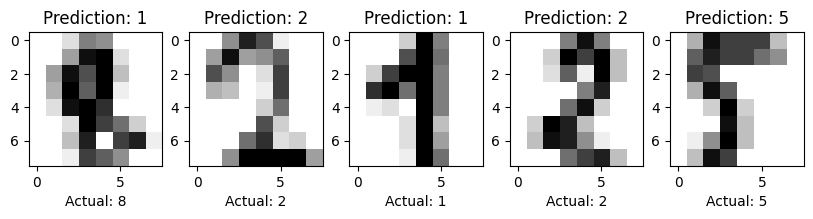

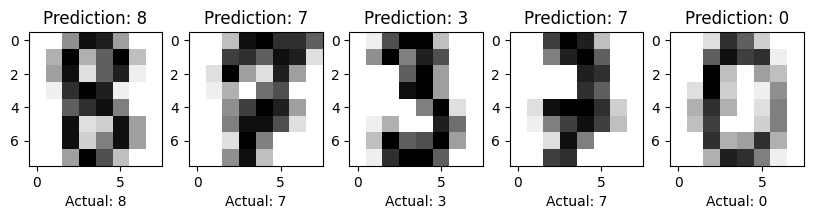

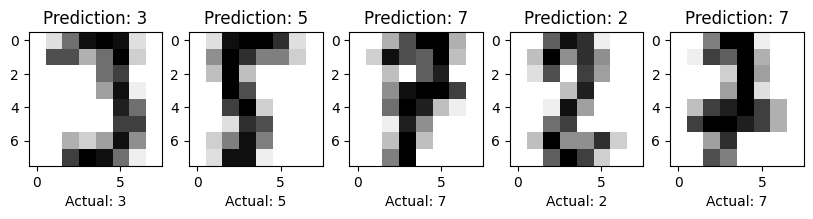

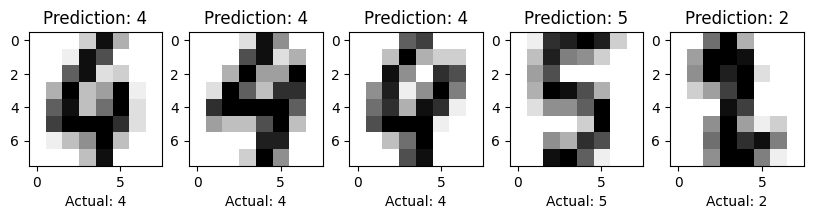

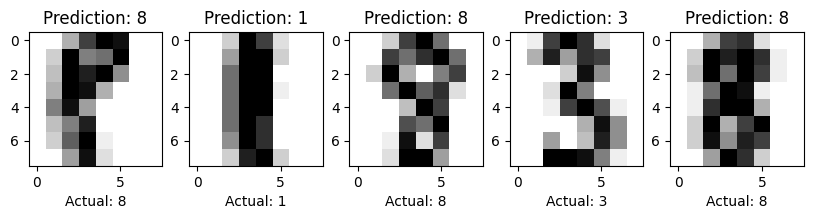

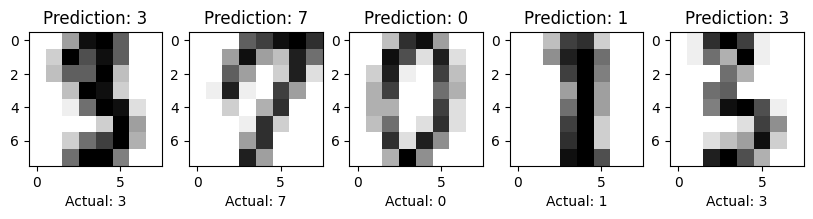

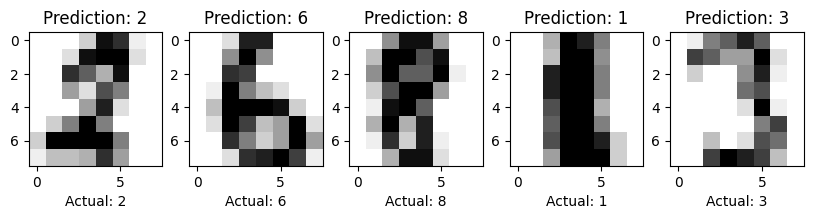

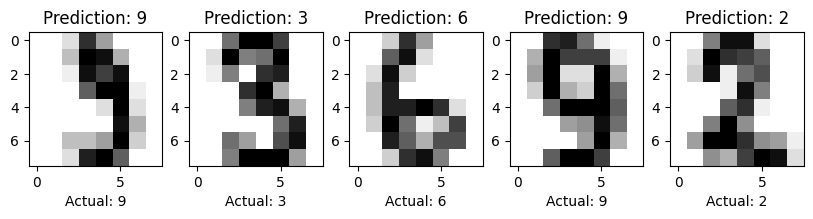

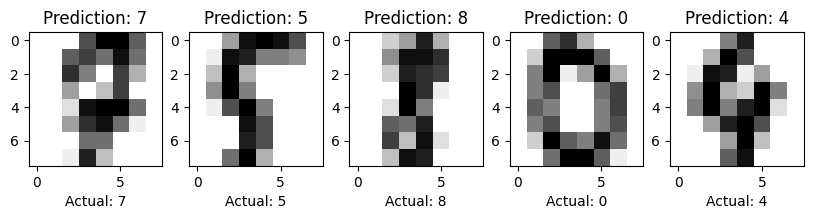

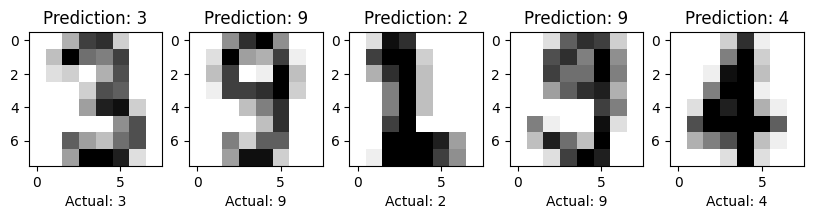

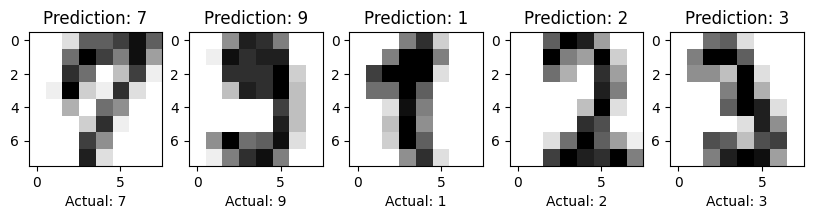

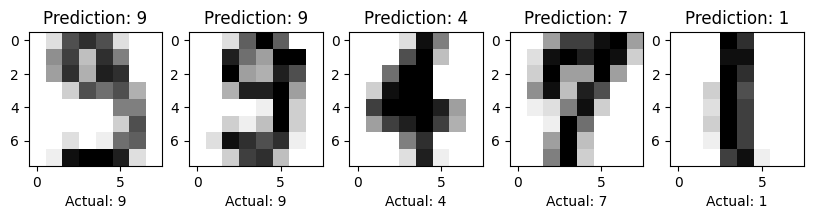

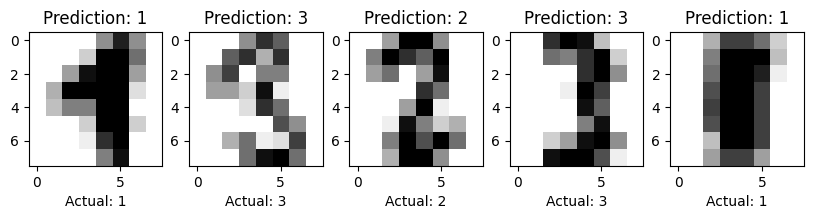

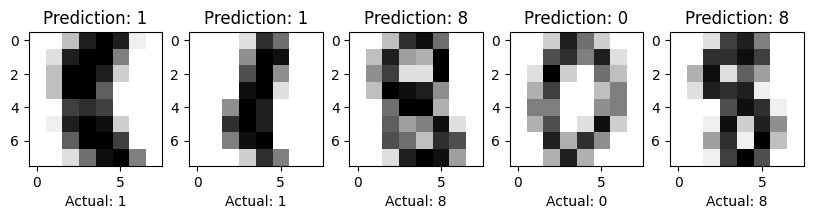

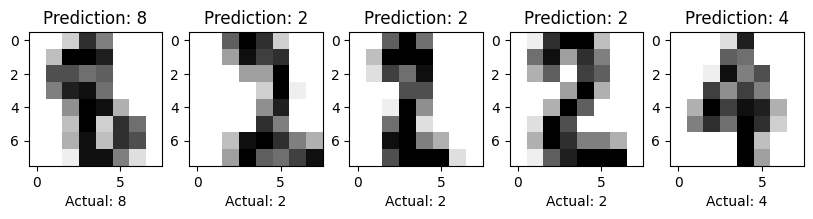

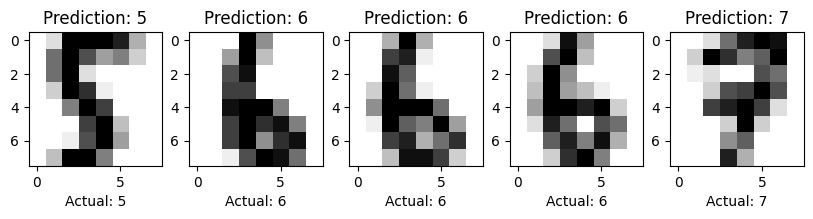

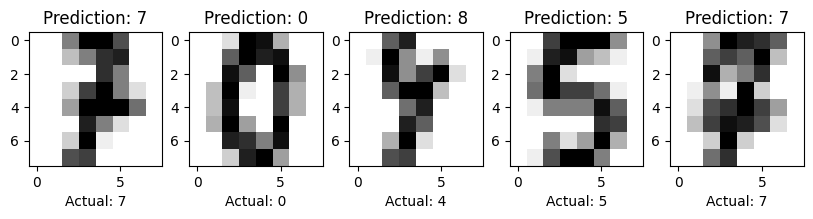

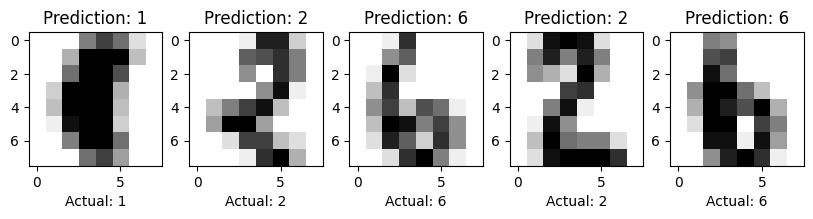

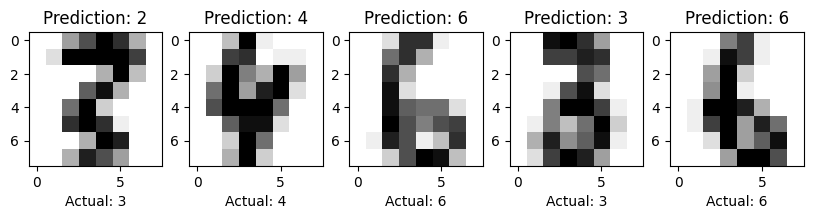

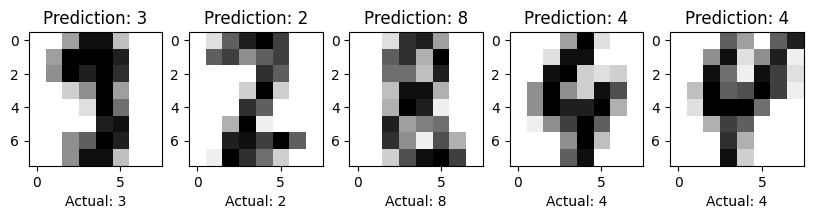

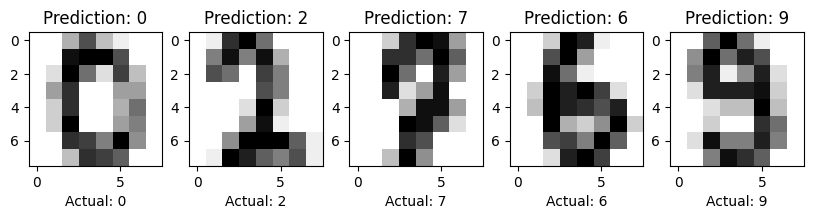

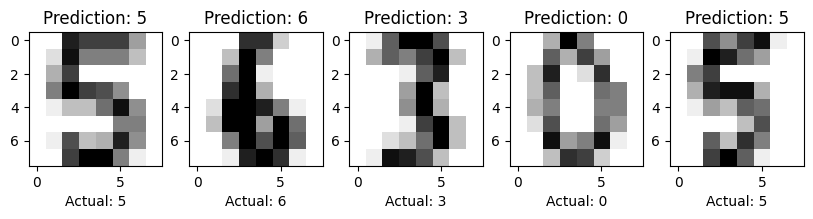

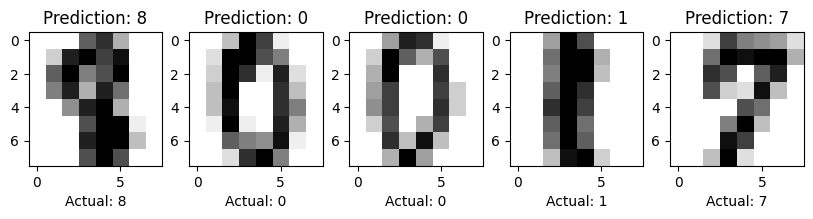

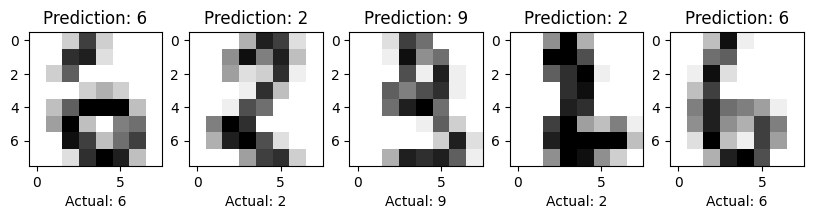

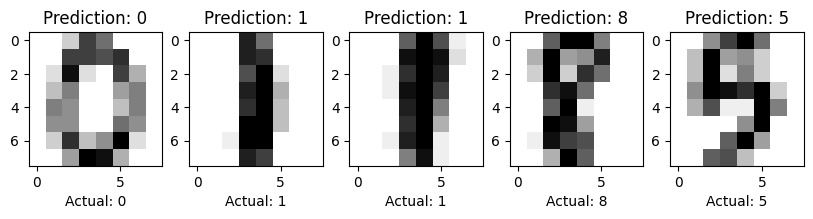

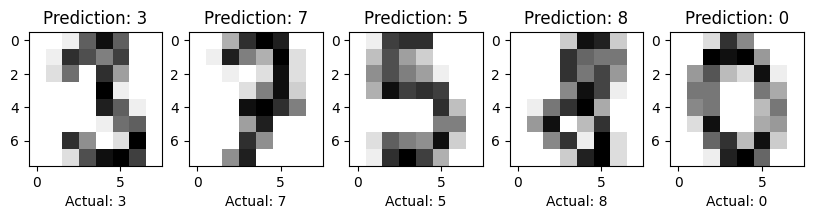

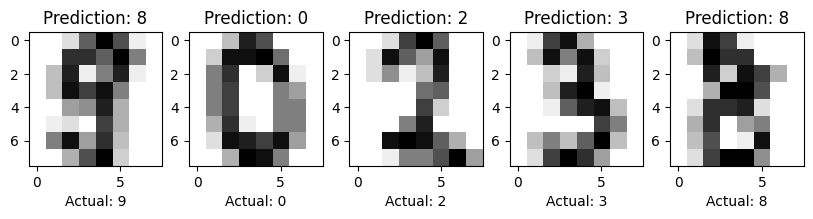

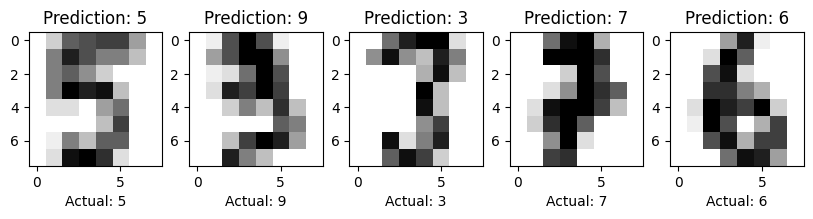

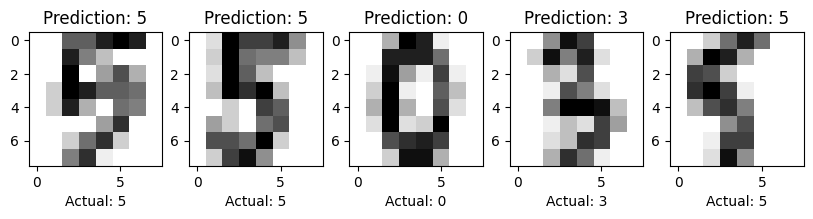

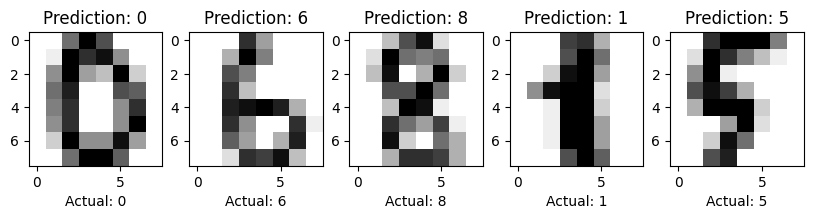

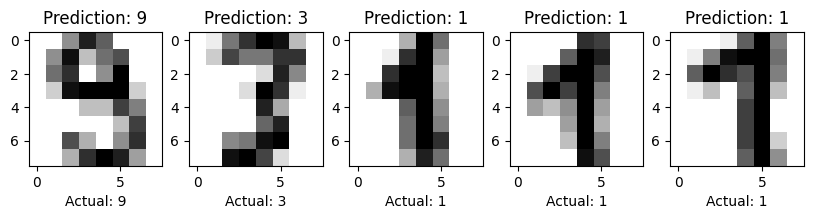

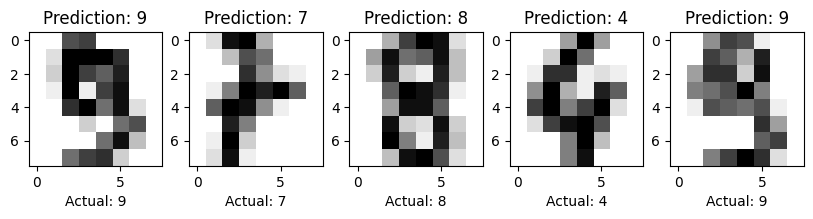

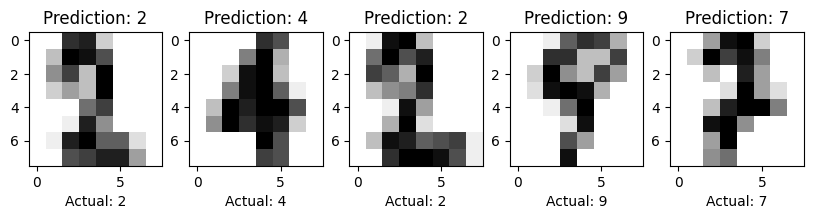

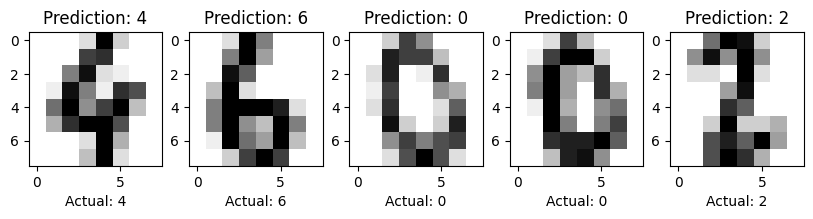

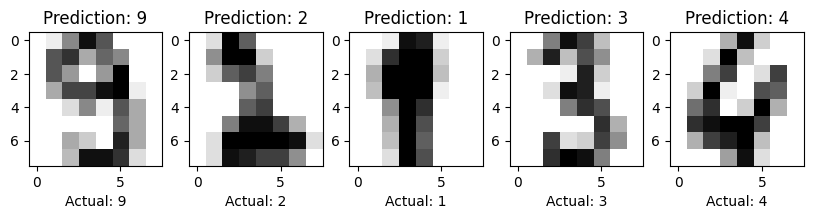

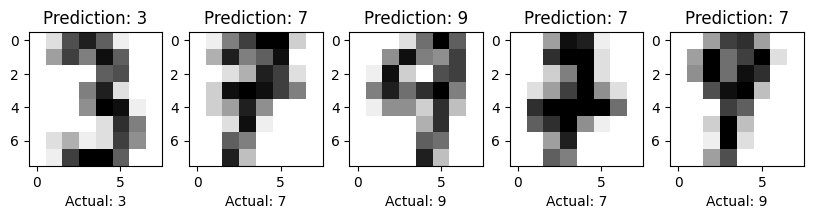

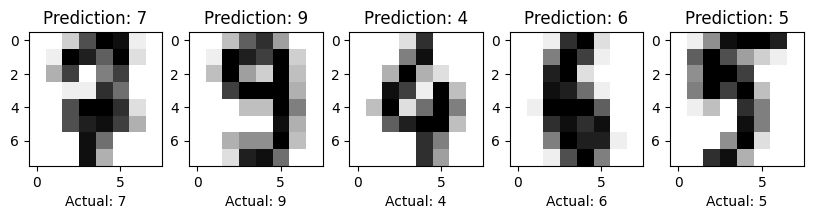

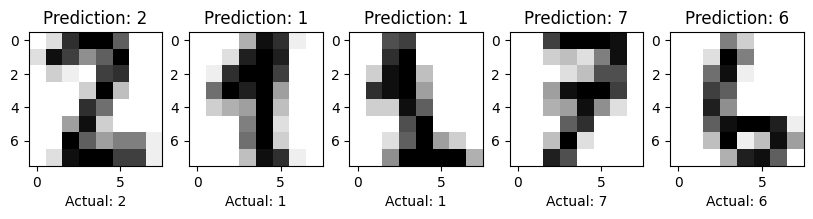

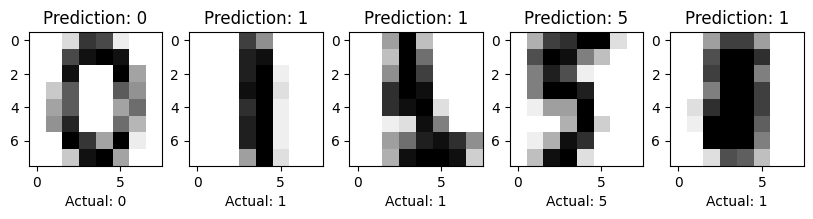

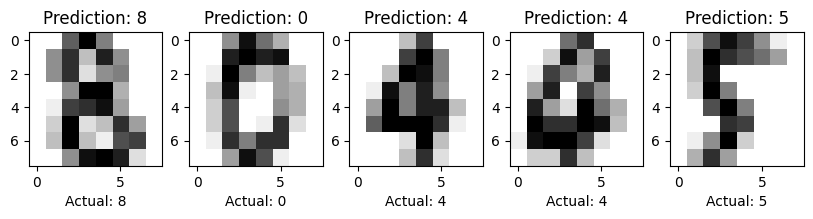

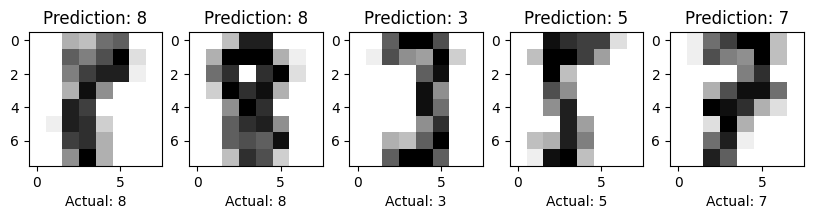

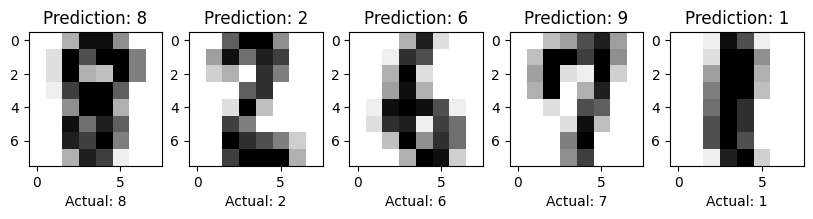

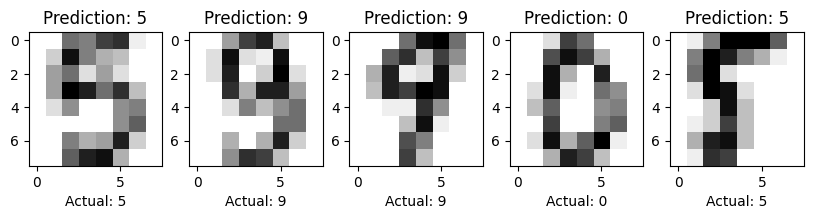

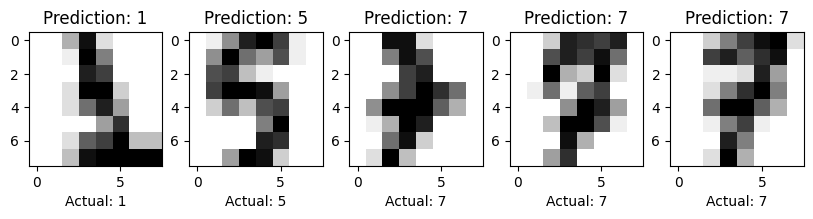

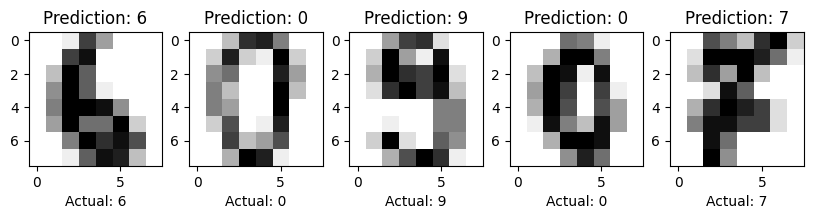

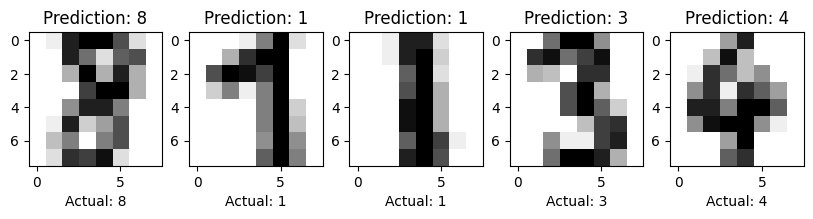

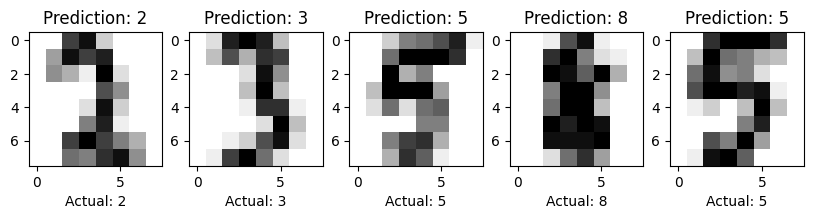

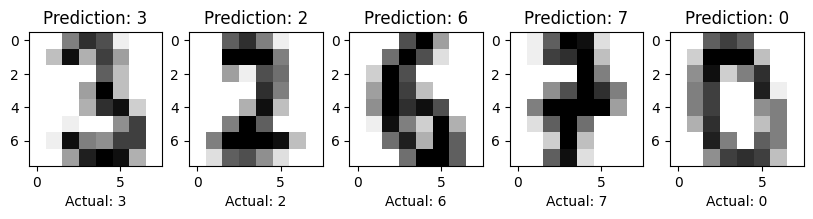

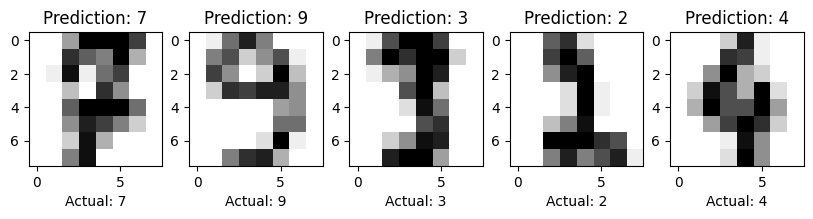

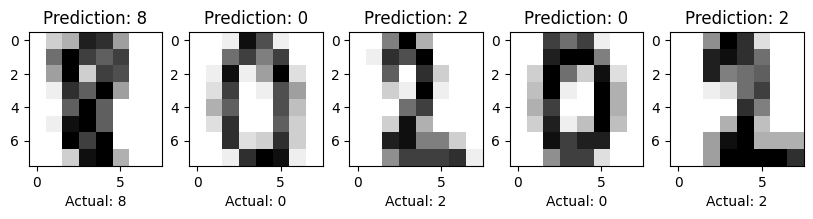

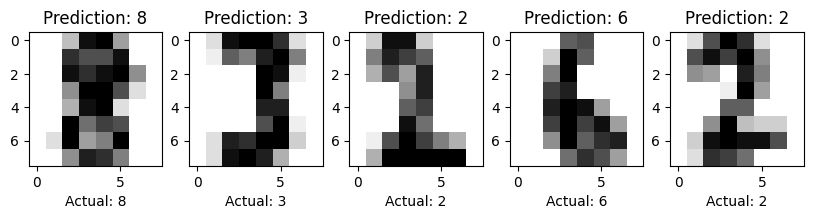

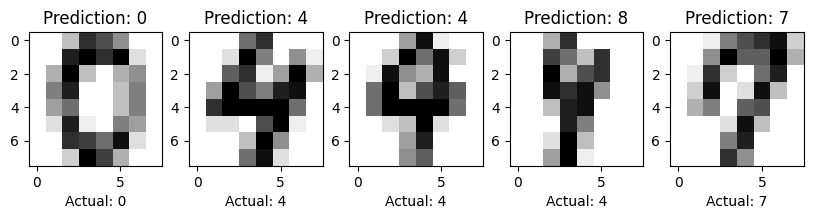

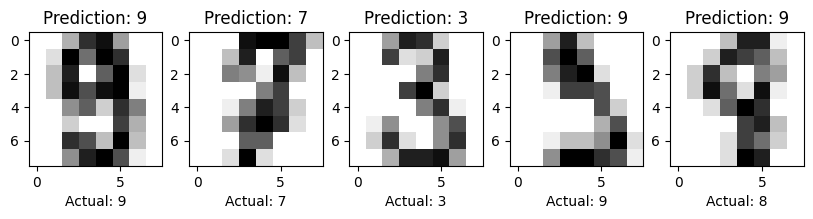

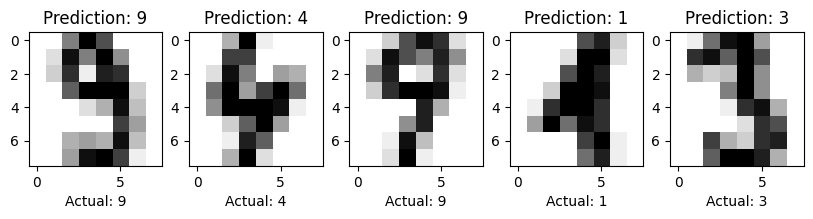

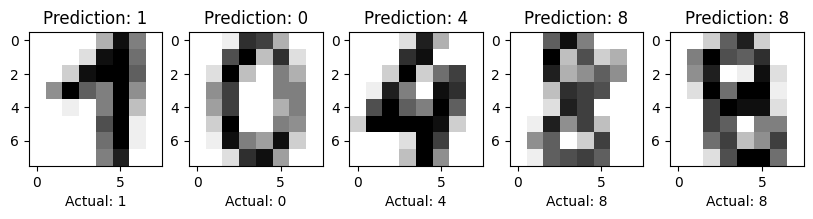

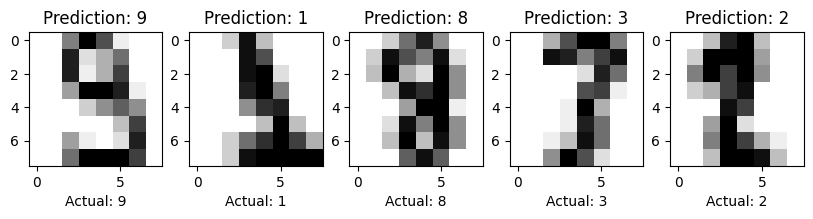

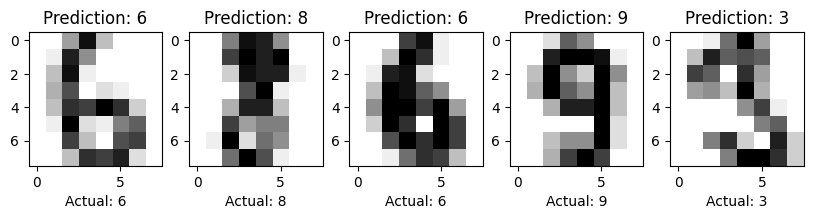

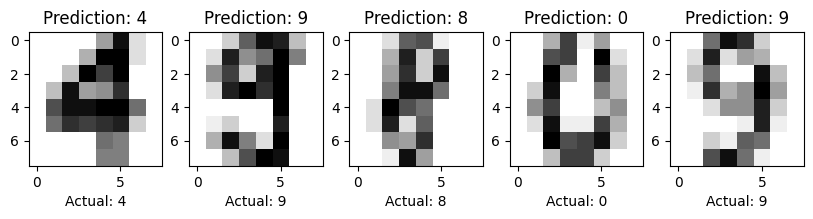

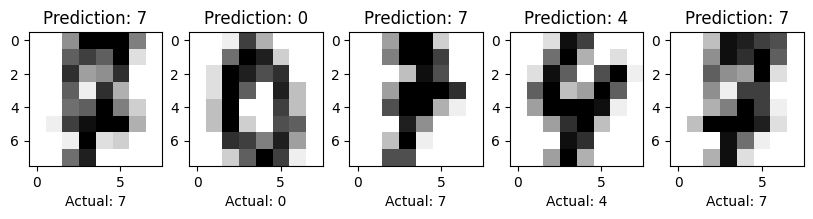

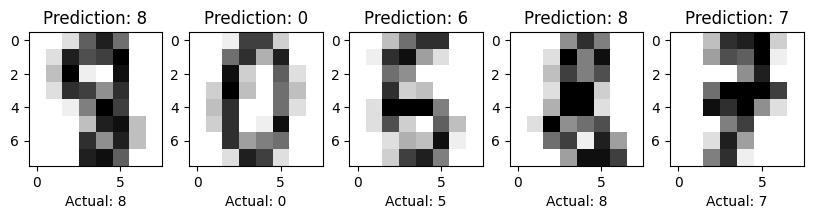

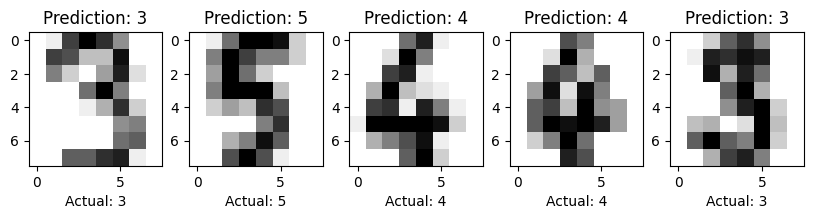

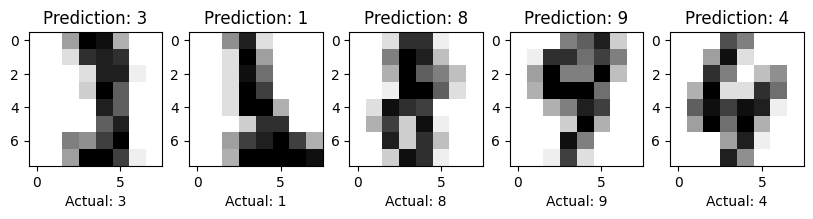

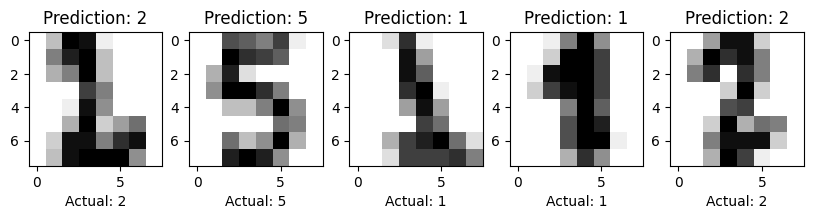

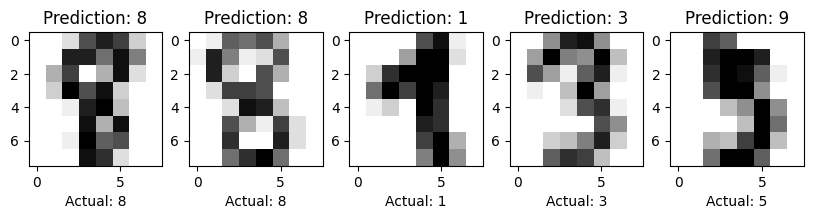

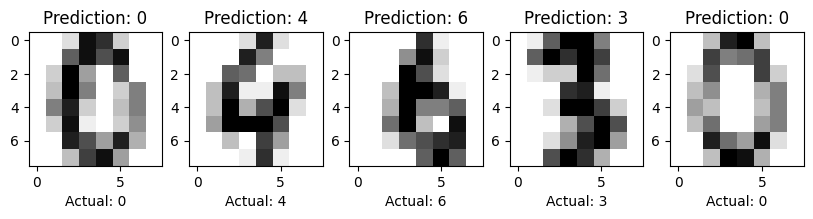

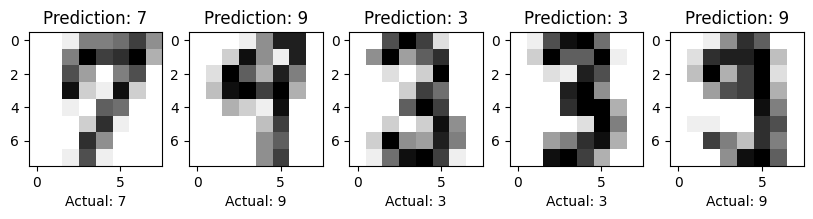

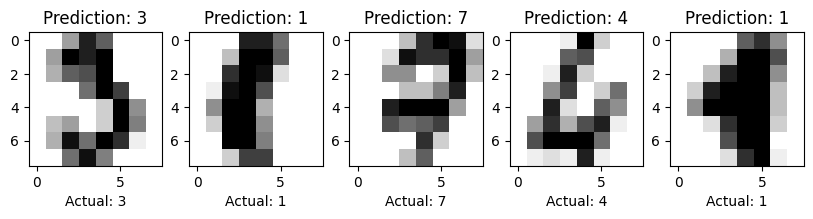

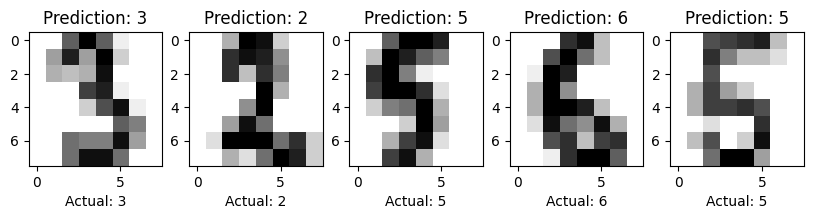

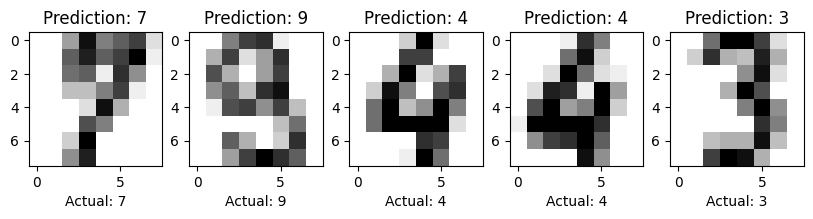

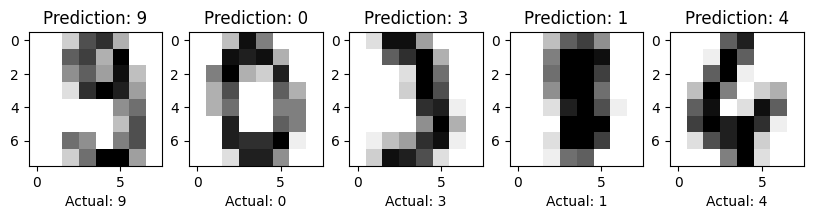

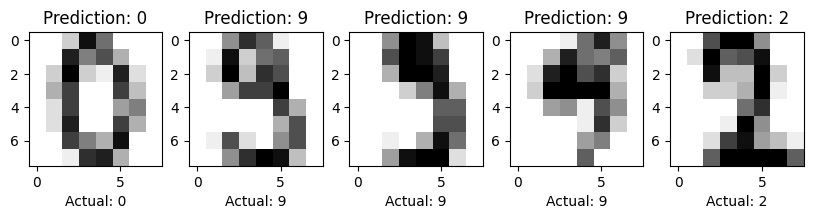

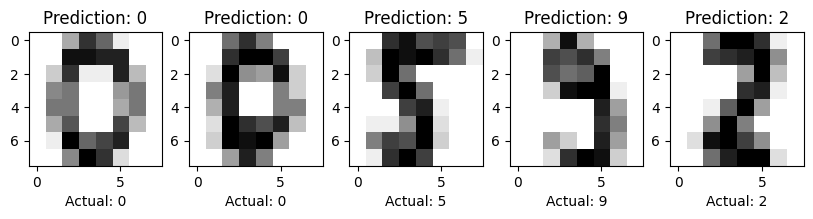

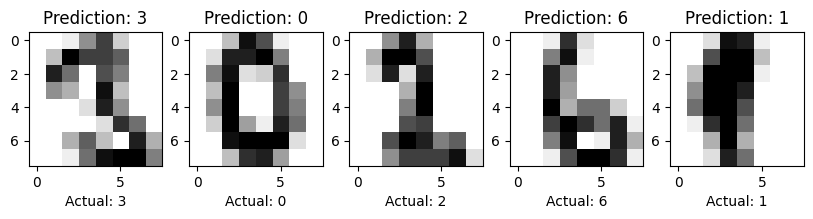

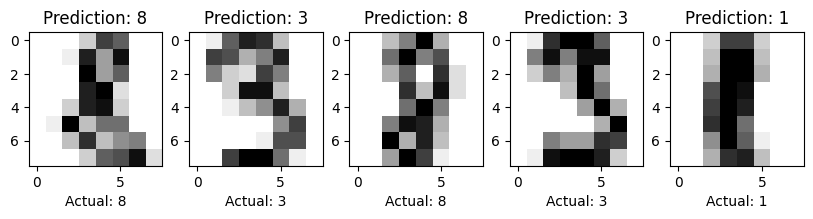

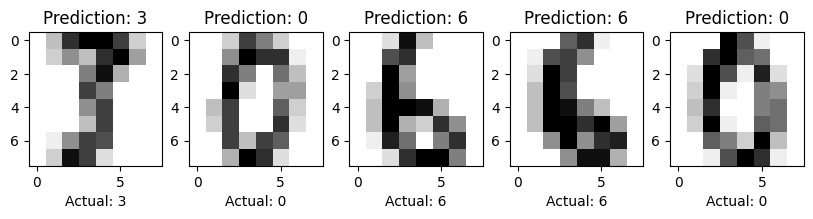

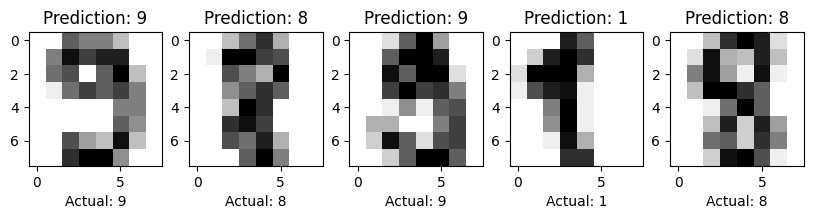

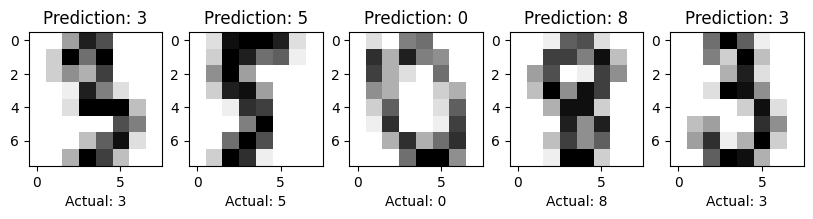

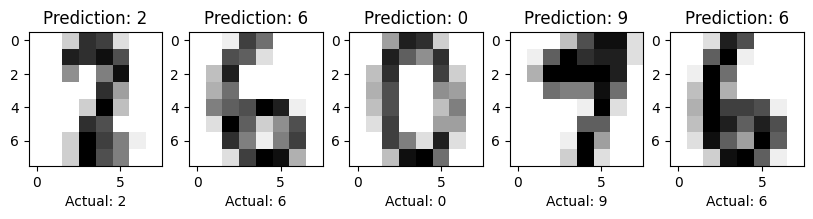

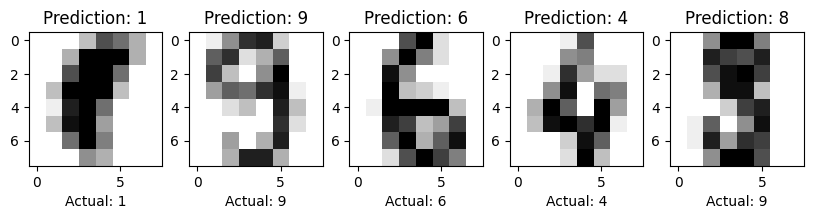

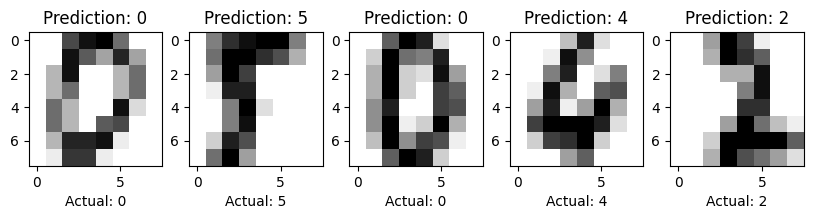

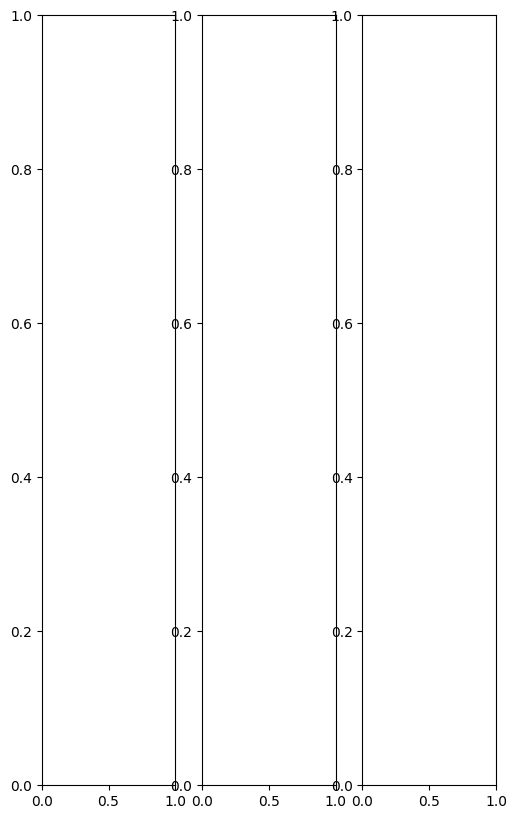

In [23]:
for i in np.arange(0, 450, 5):
    _, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
    for ax, image, prediction, actual in zip(axes, X_test[(i):(i+5)], predicted[(i):(i+5)], y_test[(i):(i+5)]):
        # ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"Prediction: {prediction}")
        ax.set_xlabel(f"Actual: {actual}")